### Problem:

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

Link to dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing


The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows: 
- Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 
- Data fetching and understand the train/val/test splits. (5 points)
- Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points)
- Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (10 points)
- Implement batch normalization for training the neural network (5 points) 
- Print the classification accuracy metrics (5 points) 

### Import libraries

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0'

In [4]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

### 1. Data fetching and understand the train/val/test splits. (5 points)

In [5]:
data_raw = h5py.File('Data/SVHN_single_grey1.h5')

In [6]:
data_raw.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [7]:
X_train = np.array(data_raw.get('X_train'))
X_test = np.array(data_raw.get('X_test'))
X_val = np.array(data_raw.get('X_val'))
y_train = np.array(data_raw.get('y_train'))
y_test = np.array(data_raw.get('y_test'))
y_val = np.array(data_raw.get('y_val'))

In [8]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((42000, 32, 32),
 (18000, 32, 32),
 (60000, 32, 32),
 (42000,),
 (18000,),
 (60000,))

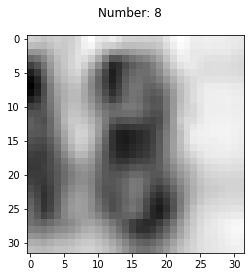

In [9]:
#Let's review the data
img_num = np.random.randint(0, X_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(X_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

### 2. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points)

In [10]:
y_train_enc = tf.convert_to_tensor(tf.keras.utils.to_categorical(y_train, num_classes=10))
y_test_enc = tf.convert_to_tensor(tf.keras.utils.to_categorical(y_test, num_classes=10))

In [11]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [12]:
X_train_reshaped = tf.keras.backend.expand_dims(X_train_norm)
X_test_reshaped = tf.keras.backend.expand_dims(X_test_norm)

#### Some notes from: https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
- Number of filters should be increasing as we go from input to output layer
- Number of filters should be a power of 2
- MaxPooling should be used to reduce the spatial dimension of the output layer
- The filter_size should be of odd integer number i.e. 3x3 or 5x5

In [13]:
# Clear the session before building the model
tf.keras.backend.clear_session()

# Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Add third convolutional layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#First Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [14]:
#Second Dense layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 3. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (10 points)
- After various trials, here I have used "adam" optimizer than "sgd" as it gave higher accuracy 

In [15]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 4. Implement batch normalization for training the neural network (5 points)

In [16]:
model.fit(X_train_reshaped, y_train_enc, validation_data=(X_test_reshaped, y_test_enc), epochs=10, batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 92s 2ms/sample - loss: 0.6891 - accuracy: 0.7882 - val_loss: 0.4322 - val_accuracy: 0.8743
Epoch 2/10
42000/42000 [==============================] - 90s 2ms/sample - loss: 0.3461 - accuracy: 0.8999 - val_loss: 0.3588 - val_accuracy: 0.8993
Epoch 3/10
42000/42000 [==============================] - 92s 2ms/sample - loss: 0.2732 - accuracy: 0.9208 - val_loss: 0.3411 - val_accuracy: 0.8985
Epoch 4/10
42000/42000 [==============================] - 89s 2ms/sample - loss: 0.2297 - accuracy: 0.9327 - val_loss: 0.3107 - val_accuracy: 0.9117
Epoch 5/10
42000/42000 [==============================] - 89s 2ms/sample - loss: 0.1917 - accuracy: 0.9446 - val_loss: 0.3172 - val_accuracy: 0.9122
Epoch 6/10
42000/42000 [==============================] - 89s 2ms/sample - loss: 0.1641 - accuracy: 0.9503 - val_loss: 0.3232 - val_accuracy: 0.9129
Epoch 7/10
42000/42000 [==============================] 

### 5. Print the classification accuracy metrics (5 points) 

In [17]:
y_pred = model.predict(X_test_reshaped)

In [18]:
y_pred_number = [np.argmax(row) for row in y_pred]

In [19]:
print('Accuracy Score of the model: %.2f%%' % (accuracy_score(y_test, y_pred_number)*100))

Accuracy Score of the model: 91.32%


In [20]:
confusion_matrix(y_test, y_pred_number)

array([[1658,   59,   17,    6,   13,    3,   10,    7,    7,   34],
       [  15, 1682,    8,   22,   40,   11,    2,   27,   11,   10],
       [   3,   17, 1675,   33,   14,   10,    4,   20,    5,   22],
       [   6,   26,   14, 1551,    9,   63,    8,   13,   14,   15],
       [   6,   40,   23,   14, 1693,    6,    9,    8,    4,    9],
       [   1,   13,    4,   44,   17, 1658,    9,    2,   10,   10],
       [  18,   16,   13,   19,   16,   86, 1609,    3,   43,    9],
       [   6,   45,   24,   25,   12,    5,    1, 1680,    4,    6],
       [  16,   33,   18,   45,    7,   19,   40,    8, 1587,   39],
       [  17,   22,   23,   15,   25,   28,    2,   15,   12, 1645]],
      dtype=int64)

### Various techniques have been tried to improve the accuracy of the CNN model:
- Adding more hidden layers
- Adding more neurons
- Adding Dropout layer
- Adding/Removing MaxPooling
- Changing Optimizer adam, sgd
- Changing batchsize
- Changing epoch size

### By employing various techniques of CNN model improvement, the best accuracy I got is around 91%.

### The model fine tuning is an exploratory exercise and we may find better parameters by experimenting more.